In [154]:
#### 请使用matplotlib、pandas、numpy来处理reviews.csv，并完成以下任务

In [155]:
import pandas as pd
pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [156]:
df = pd.read_csv("reviews.csv")

C:\Users\Kailing Wang\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,33,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### TODO1: 统计所有电影的评论数，并以柱状图（bar chart）表示评论数最多的10部电影的评论数 （2分）。
提示：可以使用如下代码来解决中文无法在图中显示的问题。
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

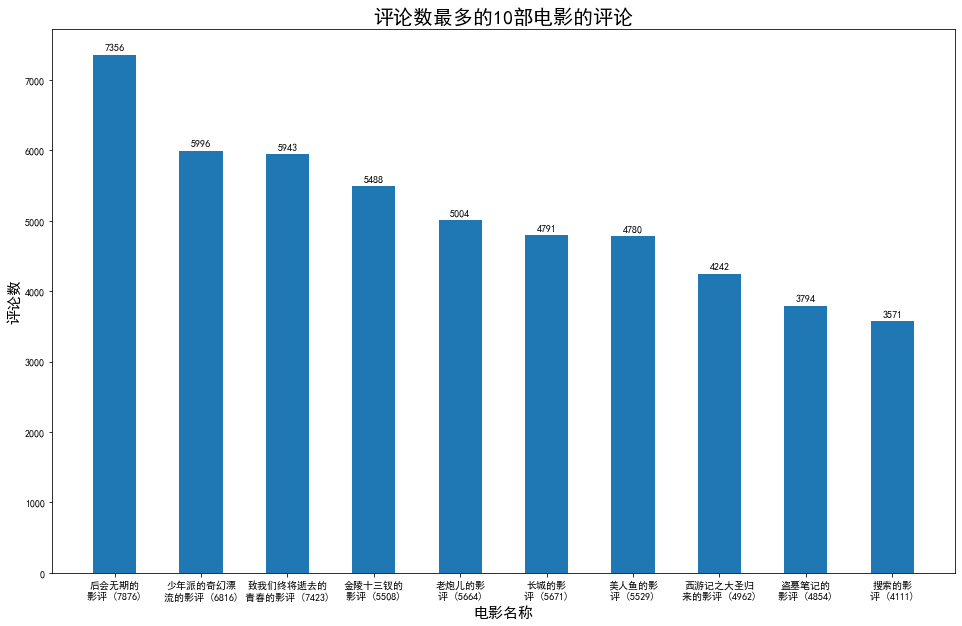

In [232]:
# TODO 1
comment_count = df['movie_name'].value_counts()
top10 = comment_count.head(10)
plt.figure(figsize=(10/0.618, 10))
index =[]
for i in range(len(top10)):
    index.append(top10.index[i][:int(len(
        top10.index[i])*2/5)]+'\n'+top10.index[i][int(len(top10.index[i])*2/5):])
plt.bar(range(len(top10)), top10.values, 0.5, tick_label=index)
plt.title('评论数最多的10部电影的评论', size=20)
for a,b in zip(range(len(top10)),top10.values):
    plt.text(a, b+50, b, ha='center', va='bottom')
plt.xlabel('电影名称', size=15)
plt.ylabel('评论数', size=15)
plt.show()


#### TODO2: 找出评论数最多的一部电影，并将其每周的评论数用折线图（plot）表示，每周为一个点（3分）。

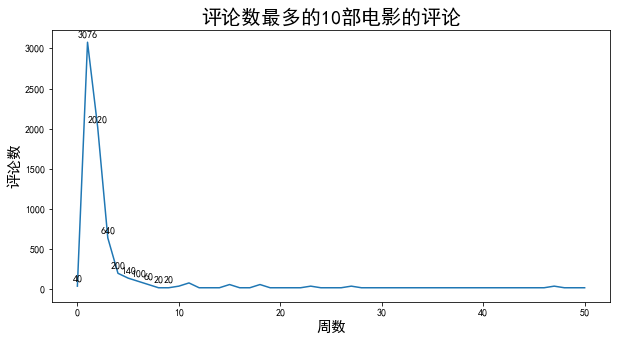

In [243]:
# TODO 2
top = top10.head(1)
name = top.index[0]
comment = df.iloc[df.index[df['movie_name'] == name].tolist(), :]
comment.sort_values('评论时间', inplace=True)
# Here the start of a week is Monday. So the data on both ends is incomplete.
comment['评论时间'] = pd.to_datetime(comment['评论时间'])
comment = comment.set_index('评论时间').to_period('W')
cmt_cnt = comment.groupby(by='评论时间').count()['movie_name']
plt.figure(figsize=(10,5))
plt.plot(range(len(cmt_cnt)), cmt_cnt.values, 0.5)
plt.title('评论数最多的10部电影的评论', size=20)
for a,b in zip(range(10),cmt_cnt.values[:10]):
    plt.text(a, b+50, b, ha='center', va='bottom')
plt.xlabel('周数', size=15)
plt.ylabel('评论数', size=15)
plt.show()